# Data Prep and Pull

### We will import our necessary packages and start pulling our data for data prep and usage.

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

# Finding the geo data for Hoboken

### Let's find the geographic data for Hoboken so we can pull it from FourSquare.

In [10]:
address = 'Hoboken, New Jersey'

geolocator = Nominatim(user_agent="My_APP")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hoboken are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hoboken are 40.7433066, -74.0323752.


# FourSquare Part 1

### Entering in our information into the Foursquare API to access it.

In [11]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Done')

Done


# FourSquare Part 2

### Creating a URL for all of the venues in Hoboken

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=YXGLRJEE00RZH3NLB3F4FNCGTHFADKCSADHO0KOLLWX1RXBD&client_secret=3B23LOIMYJ0GDHPBMJPFSYCOBBZOGCSDYRML5QZVKUFZLCWA&v=20180605&ll=40.7433066,-74.0323752&radius=500&limit=100'

# FourSquare Part 3

### Pulling the JSON for the URL of venues.

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f48e6283a36067f058913ea'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Hoboken',
  'headerFullLocation': 'Hoboken',
  'headerLocationGranularity': 'city',
  'totalResults': 106,
  'suggestedBounds': {'ne': {'lat': 40.7478066045, 'lng': -74.0264467971303},
   'sw': {'lat': 40.738806595499995, 'lng': -74.0383036028697}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cdf46dadb125481eb4236ce',
       'name': 'Work It Out-A Fitness Boutique',
       'location': {'address': '603 Willow Ave',
        'lat': 40.744356367758414,
        'lng': -74.03256658205021,
        'labeledLatLngs': [{'label': 'displa

# Foursquare Part 4

### Now we start pulling the data from Foursquare into a dataframe so we can manipulate and use it.

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Work It Out-A Fitness Boutique,4cdf46dadb125481eb4236ce,Gym / Fitness Center,40.744356,-74.032567
1,Hoboken General Store,4b6b0a45f964a520a5ee2be3,Deli / Bodega,40.743148,-74.033030
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
3,Sweet,4a4e740ff964a5207bae1fe3,Bakery,40.741623,-74.031523
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376
5,Church Square Park,49e9e49df964a5200a661fe3,Park,40.742152,-74.032230
6,Anthropologie,51f1c7e1498e7425c21efab6,Women's Store,40.741838,-74.029662
7,Dom's Bakery,4b660130f964a520ce0d2be3,Bakery,40.743387,-74.034836
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304


In [16]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Work It Out-A Fitness Boutique,4cdf46dadb125481eb4236ce,Gym / Fitness Center,40.744356,-74.032567
1,Hoboken General Store,4b6b0a45f964a520a5ee2be3,Deli / Bodega,40.743148,-74.033030
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
3,Sweet,4a4e740ff964a5207bae1fe3,Bakery,40.741623,-74.031523
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376
5,Church Square Park,49e9e49df964a5200a661fe3,Park,40.742152,-74.032230
6,Anthropologie,51f1c7e1498e7425c21efab6,Women's Store,40.741838,-74.029662
7,Dom's Bakery,4b660130f964a520ce0d2be3,Bakery,40.743387,-74.034836
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304


In [17]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Gym / Fitness Center', 'Deli / Bodega', 'Cocktail Bar', 'Bakery',
       'Indian Restaurant', 'Park', "Women's Store", 'Bubble Tea Shop',
       'Pub', 'Bagel Shop', 'Sushi Restaurant', 'Falafel Restaurant',
       'American Restaurant', 'Italian Restaurant', 'Coffee Shop',
       'Sporting Goods Shop', 'Pet Store', 'Cuban Restaurant',
       'Gaming Cafe', 'Pizza Place', 'Dog Run', 'Burger Joint', 'Bar',
       'Ice Cream Shop', 'Seafood Restaurant', 'Japanese Restaurant',
       'Yoga Studio', 'Shoe Repair', 'Boutique', 'Business Service',
       'Jewelry Store', 'Mediterranean Restaurant', 'Sandwich Place',
       'Sports Bar', 'Paper / Office Supplies Store', 'Poke Place',
       'Juice Bar', 'Korean Restaurant', 'Mexican Restaurant',
       'Donut Shop', 'Cosmetics Shop', 'Thai Restaurant', 'Optical Shop',
       'Record Shop', 'Dive Bar', 'Grocery Store', 'Stationery Store',
       'Pilates Studio', 'Restaurant', 'Pharmacy', 'Liquor Store',
       'Concert Hall', 'Salon /

In [18]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Gym / Fitness Center', 'Bakery', 'Park', "Women's Store", 'Sporting Goods Shop', 'Dog Run', 'Gaming Cafe',
               'Optical Shop', 'Yoga Studio', 'Pet Store', 'Shoe Repair', 'Jewelry Store', 'Record Shop', 'Juice Bar', 
               'Cosmetics Shop', 'Business Service', 'Salon / Barbershop', 'Liquor Store', 'Grocery Store', 'Stationery Store',
               'Pilates Studio', 'Dessert Shop', 'Bookstore', 'Concert Hall', 'Video Game Store', 'Pharmacy', 'Mobile Phone Shop',
               'Deli / Bodega']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173
12,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213
13,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465
14,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615
15,Cafe Michelina,4a7b5b6bf964a520c8ea1fe3,Italian Restaurant,40.742278,-74.030218
16,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826


# Foursquare Part 5

### Now let's get a list of venue ids so we can pull likes and add to our dataframe.

In [19]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['56d3b920498ec4e1c67c0907',
 '582dfc9565be5809f6a964ed',
 '57168865498e9517f09fa03d',
 '45e9482df964a52075431fe3',
 '56daf06fcd107605ef3d86ea',
 '4dbc9859f7b1ab37dd636d12',
 '4d9368407b5ea1437d14c8b8',
 '4a7eff1cf964a5206ff21fe3',
 '4a7b5b6bf964a520c8ea1fe3',
 '49f26862f964a520296a1fe3',
 '49f37b88f964a520a26a1fe3',
 '4eb1b6859adfb95b77765bf9',
 '4ca50f407334236a60ef1258',
 '4cdb36c1958f236a15a7ab03',
 '4d4218cd607b6dcb31df08c6',
 '58e7ed715f67173549fe6246',
 '53ed3b37498e4151087521a9',
 '4ad12c5ef964a5203ddd20e3',
 '49dfb562f964a52001611fe3',
 '57f83f7acd10164c2ec1956f',
 '527f3d1711d2f7f001c656b2',
 '4a9578dff964a520562320e3',
 '4c60c4a1de6920a111ed9664',
 '4a9ac1b1f964a520813220e3',
 '4bddbf6be75c0f47f171c503',
 '5a6b6047f427de038c51031c',
 '4a8da189f964a520501020e3',
 '4a3ad481f964a52057a01fe3',
 '4ad89c0bf964a520d31221e3',
 '5df2bca6775cb40008715de3',
 '58c470fd37da1d593431c33a',
 '5c40edaaad910e0039b9fc01',
 '4c41e1aee26920a1981e5fe7',
 '4a775512f964a5202ee41fe3',
 '5131669e582f

In [20]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[72, 42, 30, 154, 69, 71, 268, 103, 37, 123, 137, 172, 141, 83, 184, 71, 86, 46, 65, 33, 57, 76, 66, 167, 4, 42, 77, 71, 21, 0, 24, 7, 17, 73, 121, 106, 38, 16, 46, 11, 50, 6, 47, 121, 111, 69, 27, 16, 10, 17, 20, 23, 34, 23, 18, 6, 29, 31, 19]


In [21]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

59
59


# Data Prep Intro

#### The thought process behind this is that likes are a proxy for quality. The more likes there are, the better the restaurant is. This might be incorrect but API call issues (how many I can use for free) holds me back from getting price / rating data. I will then bin this data into a quality categorical variables so we can cluster appropriately.

#### I am also going to create new categorical variables for the restaurants to better group them based on type of cuisine. This way you can look for good mexican food or now what type of food might be best to eat in Hoboken if you are new to the area.

# Data Prep Part 1

####  Now let's start prepping our data for clustering. This will include combining data from different lists, creating new categorical data to be used, binning data and then encoding the data for clustering.

In [22]:
#let's make a copy of our initial dataframe just in case anything goes wrong

hoboken_venues = nearby_venues2.copy()
hoboken_venues.head()

,name,id,categories,lat,lng
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173


# Data Prep Part 2

### Let's combine our list of likes into our dataframe

In [23]:
# add in the list of likes

hoboken_venues['total likes'] = like_list
hoboken_venues.head()

,name,id,categories,lat,lng,total likes
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,72
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,42
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379,30
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,154
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,69


# Data Prep 3

### Let's look at our like data to set bins

In [24]:
# now let's bin total likes

print(hoboken_venues['total likes'].max())
print(hoboken_venues['total likes'].min())
print(hoboken_venues['total likes'].median())
print(hoboken_venues['total likes'].mean())

268
0
46.0
62.779661016949156


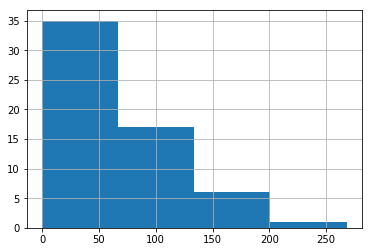

In [30]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
hoboken_venues['total likes'].hist(bins=4)
plt.show()

In [28]:
import numpy as np

In [29]:
# what are the bins we want to use?

print(np.percentile(hoboken_venues['total likes'], 25))
print(np.percentile(hoboken_venues['total likes'], 50))
print(np.percentile(hoboken_venues['total likes'], 75))

22.0
46.0
80.0


In [31]:
# now we have our bin values so let's set them to the appropriate values
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = hoboken_venues['total likes']<=24
below_avg = hoboken_venues[(hoboken_venues['total likes']>24) & (hoboken_venues['total likes']<=45)]
abv_avg = hoboken_venues[(hoboken_venues['total likes']>45) & (hoboken_venues['total likes']<=76)]
great = hoboken_venues['total likes']>76

In [32]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

hoboken_venues['total likes_cat']=hoboken_venues.apply(conditions, axis=1)

In [33]:
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,72,avg avg
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,42,below avg
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379,30,below avg
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,154,great
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,69,avg avg
12,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,71,avg avg
13,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great
14,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,103,great
15,Cafe Michelina,4a7b5b6bf964a520c8ea1fe3,Italian Restaurant,40.742278,-74.030218,37,below avg
16,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,123,great


In [34]:
# let's star the process for re-categorizing the categories

hoboken_venues['categories'].unique()

array(['Cocktail Bar', 'Indian Restaurant', 'Bubble Tea Shop', 'Pub',
       'Bagel Shop', 'Sushi Restaurant', 'Falafel Restaurant',
       'American Restaurant', 'Italian Restaurant', 'Coffee Shop',
       'Cuban Restaurant', 'Pizza Place', 'Burger Joint', 'Bar',
       'Ice Cream Shop', 'Seafood Restaurant', 'Japanese Restaurant',
       'Boutique', 'Mediterranean Restaurant', 'Sandwich Place',
       'Sports Bar', 'Paper / Office Supplies Store', 'Poke Place',
       'Korean Restaurant', 'Mexican Restaurant', 'Donut Shop',
       'Thai Restaurant', 'Dive Bar', 'Restaurant',
       'Vietnamese Restaurant'], dtype=object)

In [35]:
# let's create our new categories and create a function to apply those to our existing data


bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar']
other = ['Bagel Shop', 'Tea Room', 'Donut Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Sandwich Place', 'Boutique', 'Ice Cream Shop']
euro_asia_indian_food = ['Falafel Restaurant', 'Korean Restaurant','Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Poke Place', 'Thai Restaurant', 'Vietnamese Restaurant']
mex_southam_food = ['Cuban Restaurant', 'Mexican Restaurant', 'South American Restaurant', 'Latin American Restaurant']
american_food = ['Burger Joint', 'Restaurant', 'American Restaurant']
italian_food = ['Italian Restaurant', 'Seafood Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in mex_southam_food:
        return 'mex southam food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

hoboken_venues['categories_new']=hoboken_venues.apply(conditions2, axis=1)

In [36]:
hoboken_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,72,avg avg,bars
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,42,below avg,euro asia indian food
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379,30,below avg,other
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,154,great,bars
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,69,avg avg,other
12,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,71,avg avg,euro asia indian food
13,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great,euro asia indian food
14,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,103,great,american food
15,Cafe Michelina,4a7b5b6bf964a520c8ea1fe3,Italian Restaurant,40.742278,-74.030218,37,below avg,italian food
16,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,123,great,american food


# Data Prep Part 4

### Now let's create dummy variables for our total likes and categories so we can cluster

In [37]:
# one hot encoding
hoboken_onehot = pd.get_dummies(hoboken_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hoboken_onehot['Name'] = hoboken_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [hoboken_onehot.columns[-1]] + list(hoboken_onehot.columns[:-1])
hoboken_onehot = hoboken_onehot[fixed_columns]

hoboken_onehot.head()

,Name,american food,bars,euro asia indian food,italian food,mex southam food,other,avg avg,below avg,great,poor
2,Grand Vin,0,1,0,0,0,0,1,0,0,0
4,Karma Kafe,0,0,1,0,0,0,0,1,0,0
8,Kung Fu Tea,0,0,0,0,0,1,0,1,0,0
9,Onieal's Restaurant & Bar,0,1,0,0,0,0,0,0,1,0
11,O'Bagel,0,0,0,0,0,1,1,0,0,0


# Clustering Part 1

### Now let's run our k-means clustering algo to get our labels

In [38]:
cluster_df = hoboken_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 2, 0, 3, 3, 0, 0, 2, 0], dtype=int32)

# Clustering Part 2

### Let's add our cluster labels back into our original dataframe.

In [39]:
hoboken_venues['label'] = kmeans.labels_
hoboken_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,72,avg avg,bars,3
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,42,below avg,euro asia indian food,2
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379,30,below avg,other,2
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,154,great,bars,0
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,69,avg avg,other,3


# Clustering Part 3

### Now let's visualize what our clusters look like for Hoboken.

In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hoboken_venues['lat'], hoboken_venues['lng'], hoboken_venues['name'], hoboken_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Clustering Part 4

### Now let's see what is in each of our clusters

# Cluster 1

### Poor quality food & Mostly Italian food or other

In [41]:
hoboken_venues.loc[hoboken_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
9,Onieal's Restaurant & Bar,45e9482df964a52075431fe3,Pub,40.741608,-74.032304,154,great,bars,0
13,Mamoun's Falafel,4d9368407b5ea1437d14c8b8,Falafel Restaurant,40.742303,-74.029465,268,great,euro asia indian food,0
14,Court Street Bar & Restaurant,4a7eff1cf964a5206ff21fe3,American Restaurant,40.743322,-74.028615,103,great,american food,0
16,Zack's Oak Bar & Restaurant,49f26862f964a520296a1fe3,American Restaurant,40.740640,-74.033826,123,great,american food,0
17,Empire Coffee & Tea,49f37b88f964a520a26a1fe3,Coffee Shop,40.741375,-74.030515,137,great,other,0
22,The Cuban,4eb1b6859adfb95b77765bf9,Cuban Restaurant,40.741012,-74.029732,172,great,mex southam food,0
24,Grimaldi's,4ca50f407334236a60ef1258,Pizza Place,40.741674,-74.029578,141,great,italian food,0
25,Robongi,4cdb36c1958f236a15a7ab03,Sushi Restaurant,40.742879,-74.029280,83,great,euro asia indian food,0
26,Cork City Pub,4d4218cd607b6dcb31df08c6,Pub,40.740105,-74.030868,184,great,bars,0
29,Bareburger,53ed3b37498e4151087521a9,Burger Joint,40.742694,-74.029070,86,great,american food,0


# Cluster 2

### Below average quality food & Mostly Europe / Asia inspired food

In [42]:
hoboken_venues.loc[hoboken_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
39,Townhouse No 620,4bddbf6be75c0f47f171c503,Boutique,40.744128,-74.029070,4,poor,other,1
45,Mr Wrap's,4ad89c0bf964a520d31221e3,American Restaurant,40.746308,-74.030003,21,poor,american food,1
46,Paper Source,5df2bca6775cb40008715de3,Paper / Office Supplies Store,40.742185,-74.029320,0,poor,None,1
47,Makai Poke Co,58c470fd37da1d593431c33a,Poke Place,40.742852,-74.029213,24,poor,euro asia indian food,1
48,Gong Cha,5c40edaaad910e0039b9fc01,Bubble Tea Shop,40.743034,-74.029034,7,poor,other,1
50,Chicken Factory,4c41e1aee26920a1981e5fe7,Korean Restaurant,40.742975,-74.029083,17,poor,euro asia indian food,1
55,Napoli’s Pizzeria,59fd168ec21cb1401894e47e,Pizza Place,40.739404,-74.034909,16,poor,italian food,1
60,Pita Pit,56f136ad498ecc5661aa49ce,Sandwich Place,40.745729,-74.028582,11,poor,other,1
65,francesca's,56c5003ccd10e29c9c30a7f8,Boutique,40.740742,-74.030123,6,poor,other,1
73,Jefferson’s Coffee,5a888bc2c47cf91545daec08,Coffee Shop,40.743368,-74.029135,16,poor,other,1


# Cluster 3

### High quality food & Mostly Mexican and South American food

In [43]:
hoboken_venues.loc[hoboken_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Karma Kafe,582dfc9565be5809f6a964ed,Indian Restaurant,40.742373,-74.029376,42,below avg,euro asia indian food,2
8,Kung Fu Tea,57168865498e9517f09fa03d,Bubble Tea Shop,40.743347,-74.029379,30,below avg,other,2
15,Cafe Michelina,4a7b5b6bf964a520c8ea1fe3,Italian Restaurant,40.742278,-74.030218,37,below avg,italian food,2
32,Tutta Pesca,57f83f7acd10164c2ec1956f,Seafood Restaurant,40.740163,-74.031284,33,below avg,italian food,2
42,Mamoun's Falafel,5a6b6047f427de038c51031c,Mediterranean Restaurant,40.740090,-74.030374,42,below avg,None,2
54,Dunkin',4b191a58f964a520ffd723e3,Donut Shop,40.744912,-74.028920,38,below avg,other,2
72,Frankie & Ava's Italian Eatery,567b01d8498e9310602c8d10,Italian Restaurant,40.739127,-74.030450,27,below avg,italian food,2
83,Trattoria Saporito,4a9c695cf964a520153720e3,Italian Restaurant,40.740996,-74.029827,34,below avg,italian food,2
96,Farside,49e8d1a7f964a52097651fe3,Bar,40.743198,-74.029145,29,below avg,bars,2
97,Pho Nomenon,529fc55011d2e9632e382ae3,Vietnamese Restaurant,40.742733,-74.029298,31,below avg,euro asia indian food,2


# Cluster 4

### Above average quality food & Mostly Bars

In [44]:
hoboken_venues.loc[hoboken_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Grand Vin,56d3b920498ec4e1c67c0907,Cocktail Bar,40.743209,-74.035099,72,avg avg,bars,3
11,O'Bagel,56daf06fcd107605ef3d86ea,Bagel Shop,40.743603,-74.029173,69,avg avg,other,3
12,Ayame Hibachi & Sushi,4dbc9859f7b1ab37dd636d12,Sushi Restaurant,40.743105,-74.029213,71,avg avg,euro asia indian food,3
28,Bluestone Lane,58e7ed715f67173549fe6246,Coffee Shop,40.741601,-74.029410,71,avg avg,other,3
30,Moran's Pub,4ad12c5ef964a5203ddd20e3,Bar,40.742553,-74.031192,46,avg avg,bars,3
31,Ben & Jerry's,49dfb562f964a52001611fe3,Ice Cream Shop,40.741430,-74.029484,65,avg avg,other,3
33,Otto Strada,527f3d1711d2f7f001c656b2,Italian Restaurant,40.746604,-74.031161,57,avg avg,italian food,3
34,Illuzion,4a9578dff964a520562320e3,Japanese Restaurant,40.741229,-74.029582,76,avg avg,euro asia indian food,3
35,Dozzino,4c60c4a1de6920a111ed9664,Pizza Place,40.744612,-74.035632,66,avg avg,italian food,3
44,Mikie Squared Bar & Grill,4a3ad481f964a52057a01fe3,Sports Bar,40.744032,-74.028956,71,avg avg,bars,3
